In [5]:
#Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

pd.set_option("display.max_columns", 101)
df=pd.read_csv(r"C:\Users\HP\Downloads\Compressed\interviews\HackerRank-Data-Scientist-Hiring-Test-master\train.csv")
df.describe()


,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,362.000000,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,231.455801,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,134.799202,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,0.000000,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,116.250000,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,233.500000,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,349.750000,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,461.000000,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


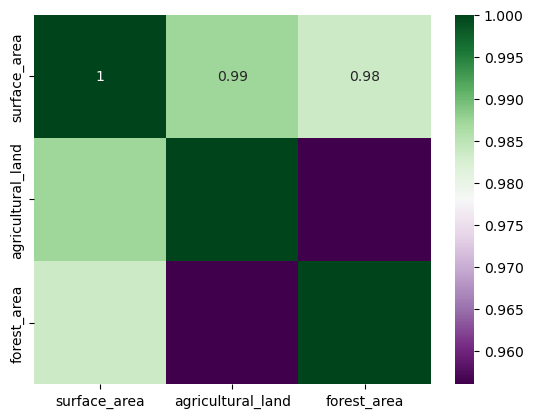

In [6]:
sns.heatmap(df[['surface_area', 'agricultural_land','forest_area']].corr(),
            cmap='PRGn',annot=True);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


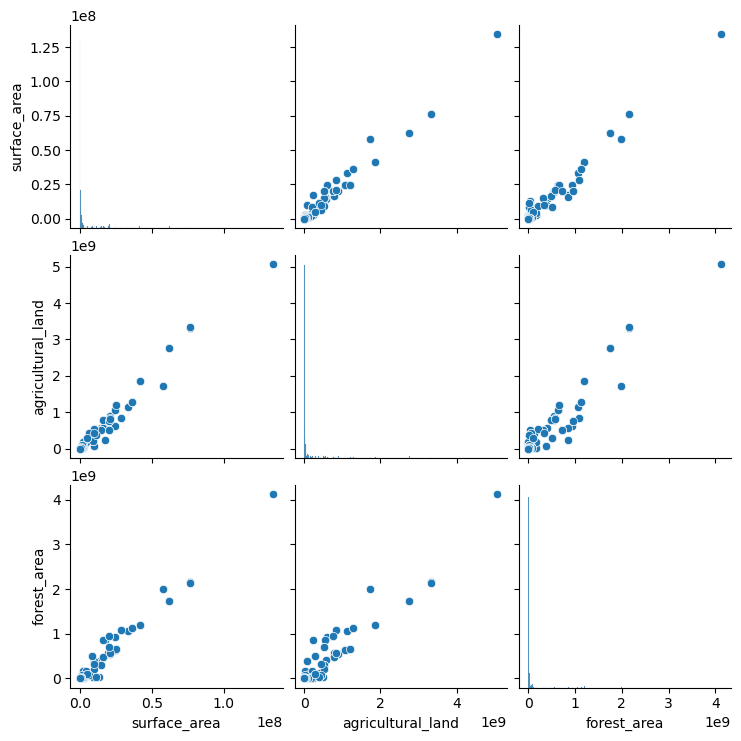

In [7]:
# Plot pairwise relationship and distribution of these three variables
sns.pairplot(df[['surface_area', 'agricultural_land','forest_area']]);

In [8]:
# make a copy of the orginal dataframe
df1 = df.copy()

# Step 1: Multiply 'surface_area' by 100
df1['surface_area'] = df1['surface_area'] * 100

# Step 2: Creates new variables 
df1['agricultural_portion'] = df1['agricultural_land'] / df1['surface_area'] 
df1['forest_portion'] = df1['forest_area'] / df1['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
df1.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Show the first 10 row of df1
df1.head(10)

,Unnamed: 0,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion
0,0,1.205400e+07,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195,0.218420,0.449464
1,1,7.526100e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715
2,2,1.396000e+05,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573
3,3,2.758812e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940
4,4,3.400000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706
5,5,7.835600e+07,612800.0,37.699524,34.134476,medium low,NaN,0.740964,NaN,less than 1 per person,45 per 100 people,1.166004e+08,very high access,[0%-25%),74.862439,0.499032,0.148224
6,6,2.846040e+09,5032780.0,32.853558,37.469387,medium high,2.773339,NaN,NaN,more than 1 per person,64 per 100 people,4.702241e+08,very high access,[0%-25%),76.569368,0.294847,0.379839
7,7,5.490910e+07,325600.0,24.582761,54.237239,high,1.955685,NaN,NaN,less than 1 per person,81 per 100 people,4.093085e+08,very high access,[25%-50%),81.968293,0.526820,0.304076
8,8,3.571700e+07,186450.0,18.091168,56.596832,high,2.008491,NaN,NaN,more than 1 per person,82 per 100 people,1.110775e+09,very high access,[25%-50%),80.892683,0.478109,0.327452
9,10,7.160000e+04,147600.0,51.288344,48.711656,unknown,NaN,0.377388,NaN,more than 1 per person,72 per 100 people,6.353061e+08,very high access,[0%-25%),81.995122,0.010340,0.231586


In [9]:
# Check missing values
df1.isnull().sum()

Unnamed: 0                         0
surface_area                       0
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
agricultural_portion               4
forest_portion                     5
dtype: int64